In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import specgram
from scipy.io import wavfile
from skimage.feature import peak_local_max

In [2]:
%matplotlib inline
plt.rcParams.update({'font.size': 18})

In [3]:
rate1, song_array1 = wavfile.read('Katy_Perry.wav')
rate2, song_array2 = wavfile.read('Daft_Punk.wav')

In [4]:
spec1, freqs1, t1 = specgram(song_array1, NFFT=4096, Fs=rate1, noverlap=2048)
spec2, freqs2, t2 = specgram(song_array2, NFFT=4096, Fs=rate2, noverlap=2048)

spec1[spec1 == 0] = 1e-6
spec2[spec2 == 0] = 1e-6

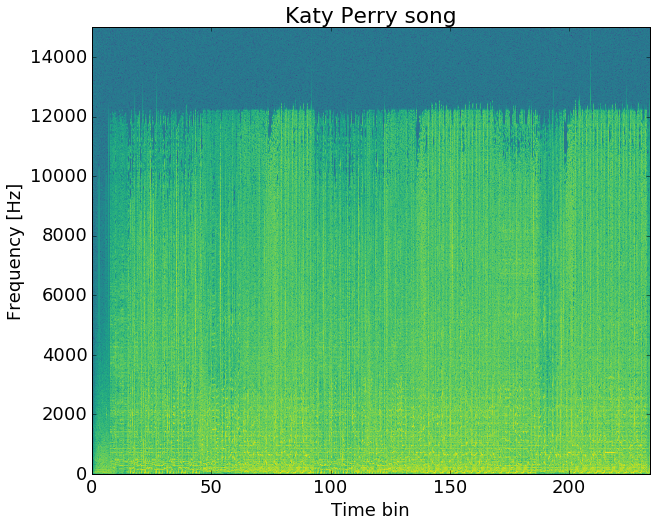

In [17]:
fig1 = plt.figure(figsize=(10, 8), facecolor='white')
extent = 0, np.amax(t1), freqs1[0], freqs1[-1]
Z = 10.0 * np.log10(spec1)
Z = np.flipud(Z)
plt.imshow(Z, cmap='viridis', extent=extent)
plt.xlabel('Time bin')
plt.ylabel('Frequency [Hz]')
plt.title('Katy Perry song')
plt.axis('auto')
ax = plt.gca()
ax.set_xlim([0, extent[1]])
ax.set_ylim([freqs1[0], freqs1[-1]])
plt.show()

In [7]:
def cut_specgram(min_freq, max_freq, spec, freqs):
    spec_cut = spec[(freqs >= min_freq) & (freqs <= max_freq)]
    freqs_cut = freqs[(freqs >= min_freq) & (freqs <= max_freq)]
    Z_cut = 10.0 * np.log10(spec_cut)
    Z_cut = np.flipud(Z_cut)
    return Z_cut, freqs_cut

In [20]:
def show_peaks(Z, freqs, t, coord, title):
    fig = plt.figure(figsize=(10, 8), facecolor='white')
    plt.imshow(Z, cmap='viridis')
    plt.scatter(coord[:, 1], coord[:, 0])
    ax = plt.gca()
    plt.xlabel('Time bin')
    plt.ylabel('Frequency')
    plt.title(title, fontsize=18)
    plt.axis('auto')
    ax.set_xlim([0, len(t)])
    ax.set_ylim([len(freqs), 0])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    plt.show()

In [9]:
min_freq = 0
max_freq = 15000

Z1, freqs1 = cut_specgram(min_freq, max_freq, spec1, freqs1)
Z2, freqs2 = cut_specgram(min_freq, max_freq, spec2, freqs2)

In [10]:
coordinates1 = peak_local_max(Z1, min_distance=20, threshold_abs=20)
coordinates2 = peak_local_max(Z2, min_distance=20, threshold_abs=20)

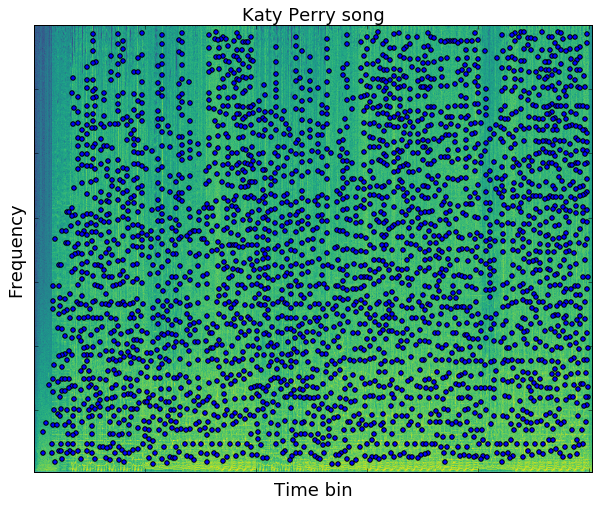

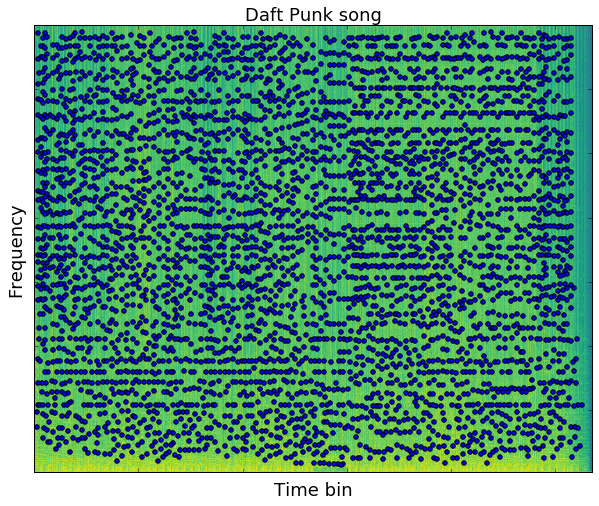

In [21]:
show_peaks(Z1, freqs1, t1, coordinates1, 'Katy Perry song')
show_peaks(Z2, freqs2, t2, coordinates2, 'Daft Punk song')